In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_excel("../data/raw/entrenamiento.xlsx")
df = df.rename(columns={"C7.1": "C8", "des": "QUALITY"})

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
C1,3684.0,6.857166,0.846430,3.800000,6.300000,6.800000,7.300000,14.200000
C2,3664.0,0.421440,0.988207,0.076961,0.190620,0.231112,0.285179,6.913737
C3,3648.0,0.284054,0.086887,0.000000,0.239017,0.277632,0.329304,0.802002
C4,3636.0,6.424642,5.084063,0.600000,1.700000,5.300000,9.900000,65.800000
C5,3659.0,40.685294,25.106022,0.020000,33.000000,41.000000,49.000000,346.000000
C6,3655.0,35.216142,17.167346,2.000000,23.000000,34.000000,46.000000,289.000000
C7,3645.0,4.885591,0.341723,2.302585,4.691348,4.912655,5.129899,6.089045
C8,3646.0,65.824651,245.359289,0.987110,0.991800,0.994100,0.996825,1001.000000
C9,3658.0,3.188291,0.152155,2.720000,3.090000,3.180000,3.280000,3.820000
C10,3639.0,0.395421,0.074535,0.198851,0.343590,0.385262,0.438255,0.732368


In [5]:
df_no_missing = df.dropna()

In [6]:
scaler = StandardScaler()
df_scaled = df_no_missing.drop(columns=["QUALITY"])

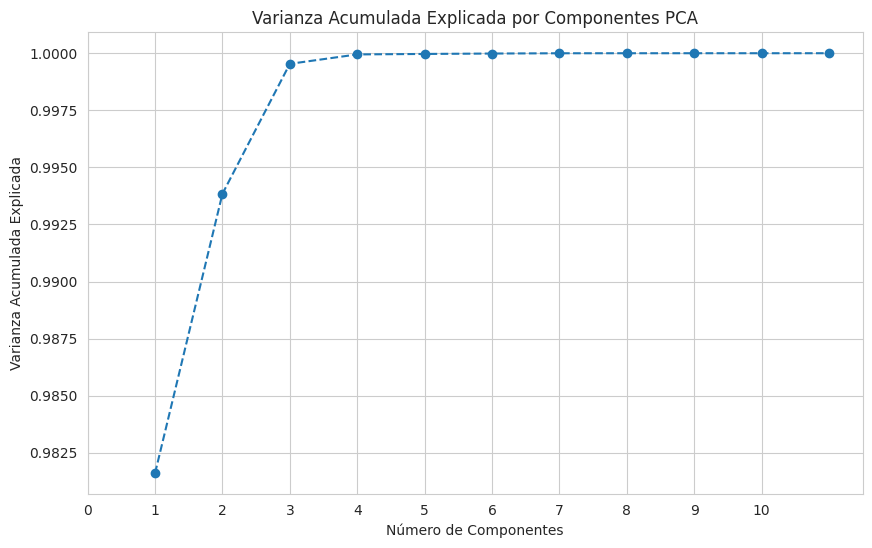

In [15]:
# 2. Aplicar PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# 3. Calcular la varianza acumulada explicada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Visualizar la varianza acumulada explicada
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title("Varianza Acumulada Explicada por Componentes PCA")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada Explicada")
plt.xticks(np.arange(0, len(pca.explained_variance_ratio_)))  # Esto hará que se muestren todos los números
plt.grid(True)
plt.show()

In [18]:
X = df_no_missing.drop("QUALITY", axis=1)
y = df_no_missing["QUALITY"]

# Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con 3 componentes principales
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [19]:
# Importando las bibliotecas y modelos necesarios nuevamente
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error

# Redefiniendo los modelos
models_pca = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boost": GradientBoostingRegressor()
}

results_pca = {}

for name, model in models_pca.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    mae = mean_absolute_error(y_test, y_pred)
    results_pca[name] = mae

results_pca_df = pd.DataFrame(list(results_pca.items()), columns=["Model", "MAE after PCA"]).sort_values(by="MAE after PCA")
results_pca_df

,Model,MAE after PCA
4,Random Forest,0.634106
5,SVR,0.636472
6,AdaBoost,0.646966
7,Gradient Boost,0.659875
1,Ridge Regression,0.665372
0,Linear Regression,0.665387
2,Lasso Regression,0.672200
3,Decision Tree,0.790503
